# Import
Import necessary library and frameworks for data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# Load data

In [2]:
df_newsnet_fake1 = pd.read_csv("../data/FakeNewsNet/gossipcop_fake.csv")
df_newsnet_real1 = pd.read_csv("../data/FakeNewsNet/gossipcop_real.csv")
df_newsnet_fake2 = pd.read_csv("../data/FakeNewsNet/politifact_fake.csv")
df_newsnet_real2 = pd.read_csv("../data/FakeNewsNet/politifact_real.csv")

df_kaggle_fake = pd.read_csv("../data/fake-news-kaggle/Fake.csv")
df_kaggle_true = pd.read_csv("../data/fake-news-kaggle/True.csv")

df_more = pd.read_csv("../data/More-fake-news/train.tsv", sep="\t")

I have 3 different datasets, my goal is to analyze each one of them to see if I can merge them into a master dataset for fake news detection

In [3]:
print(df_newsnet_fake1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5323 non-null   object
 1   news_url   5067 non-null   object
 2   title      5323 non-null   object
 3   tweet_ids  5135 non-null   object
dtypes: object(4)
memory usage: 166.5+ KB
None


In [4]:
print(df_newsnet_fake2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         432 non-null    object
 1   news_url   428 non-null    object
 2   title      432 non-null    object
 3   tweet_ids  392 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB
None


In [5]:
print(df_newsnet_real1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16817 entries, 0 to 16816
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16817 non-null  object
 1   news_url   16804 non-null  object
 2   title      16817 non-null  object
 3   tweet_ids  15759 non-null  object
dtypes: object(4)
memory usage: 525.7+ KB
None


In [6]:
print(df_newsnet_real2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         624 non-null    object
 1   news_url   567 non-null    object
 2   title      624 non-null    object
 3   tweet_ids  409 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB
None


In [7]:
df_newsnet_fake1["real"] = 0
df_newsnet_fake2["real"] = 0

df_newsnet_real1["real"] = 1
df_newsnet_real2["real"] = 1

Let"s add our target variable to them.

In [8]:
df_newsnet = pd.concat([df_newsnet_fake1, df_newsnet_real1, df_newsnet_fake2, df_newsnet_real2], ignore_index=True)
df_newsnet

,id,news_url,title,tweet_ids,real
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,0
...,...,...,...,...,...
23191,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN,1
23192,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...,1
23193,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN,1
23194,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874,1


In [9]:
df_kaggle_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
df_kaggle_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
df_kaggle_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [12]:
df_kaggle_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
df_kaggle_fake["real"] = 0
df_kaggle_true["real"] = 1

In [14]:
df_kaggle = pd.concat([df_kaggle_fake, df_kaggle_true])

In [15]:
df_more

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0
...,...,...,...,...,...,...
29995,6880,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politicsNews,"December 6, 2016",1
29996,17818,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,"October 11, 2017",1
29997,5689,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,"June 28, 2016",0
29998,15805,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,"November 2, 2017",1


In [16]:
df_more.rename(columns={"Unnamed: 0": "ID", "label":"real"}, inplace=True)

In [17]:
df_more.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       30000 non-null  int64 
 1   title    30000 non-null  object
 2   text     30000 non-null  object
 3   subject  30000 non-null  object
 4   date     30000 non-null  object
 5   real     30000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


Now we only have 3 datasets to work with:
- `df_newsnet`
- `df_kaggle`
- `df_more`
Where the target variable is called real, 0 = fake news, 1 = real news.
The next steps is to identify, if possible the type of news to ensure no bias is being created towards a specific "genre". If all good, we can get everything together into a master file.

In [18]:
df_newsnet.columns

Index(['id', 'news_url', 'title', 'tweet_ids', 'real'], dtype='object')

In [19]:
df_kaggle.columns

Index(['title', 'text', 'subject', 'date', 'real'], dtype='object')

In [20]:
df_more.columns

Index(['ID', 'title', 'text', 'subject', 'date', 'real'], dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'News'),
  Text(1, 0, 'politics'),
  Text(2, 0, 'Government News'),
  Text(3, 0, 'left-news'),
  Text(4, 0, 'US_News'),
  Text(5, 0, 'Middle-east'),
  Text(6, 0, 'politicsNews'),
  Text(7, 0, 'worldnews')])

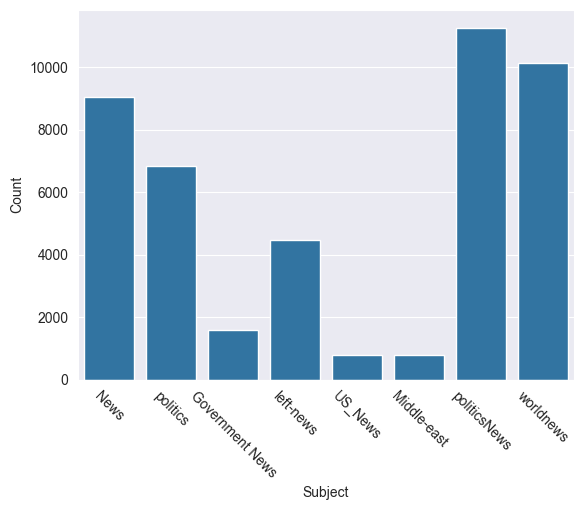

In [21]:
sns.countplot(df_kaggle, x=df_kaggle["subject"])
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=315)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'politicsNews'),
  Text(1, 0, 'Government News'),
  Text(2, 0, 'left-news'),
  Text(3, 0, 'politics'),
  Text(4, 0, 'worldnews'),
  Text(5, 0, 'News'),
  Text(6, 0, 'Middle-east'),
  Text(7, 0, 'US_News')])

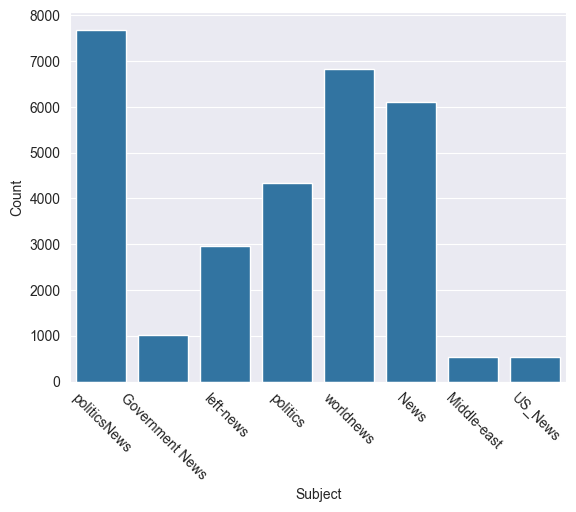

In [22]:
sns.countplot(df_more, x=df_more["subject"])
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=315)

In [23]:
df_news = pd.concat([df_kaggle, df_more])
df_news

,title,text,subject,date,real,ID
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,NaN
...,...,...,...,...,...,...
29995,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politicsNews,"December 6, 2016",1,6880.0
29996,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,"October 11, 2017",1,17818.0
29997,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,"June 28, 2016",0,5689.0
29998,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,"November 2, 2017",1,15805.0


Check for any duplicated entry in our dataset, that might happen since the data may be from the same source or same time period

In [24]:
df_duplicated = df_news[df_news.duplicated(["title", "text"])]
df_duplicated.sort_values(by=["title"], ascending=True)

,title,text,subject,date,real,ID
20771,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...,Hillary may find out she needs more than black...,left-news,"Apr 6, 2016",0,NaN
7023,#Austin: Fights Break Out Between Police and S...,Commies carrying flags fought with the Austin ...,politics,"Sep 23, 2017",0,9841.0
17930,#Austin: Fights Break Out Between Police and S...,Commies carrying flags fought with the Austin ...,left-news,"Sep 23, 2017",0,NaN
23720,#Berkeley CRAZY! RIOTERS CHASE And Beat People...,Is anyone else thinking what we re thinking ab...,politics,"Feb 2, 2017",0,11756.0
19211,#Berkeley CRAZY! RIOTERS CHASE And Beat People...,Is anyone else thinking what we re thinking ab...,left-news,"Feb 2, 2017",0,NaN
...,...,...,...,...,...,...
19149,“Would You Rather Do A Job You Hate And Not Pa...,"Filmmaker and patriot, Dennis Michael Lynch is...",left-news,"Feb 12, 2017",0,NaN
28626,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,"No matter which candidate you support, this mo...",Government News,"Mar 21, 2016",0,16696.0
16696,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,"No matter which candidate you support, this mo...",Government News,"Mar 21, 2016",0,NaN
6541,“You’re Not Welcome!” Obama As Welcome At Rose...,Roseberg residents and families of victims are...,left-news,"Oct 7, 2015",0,21428.0


In [25]:
len(df_duplicated)

12772

In [26]:
df_newsnet

,id,news_url,title,tweet_ids,real
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,0
...,...,...,...,...,...
23191,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN,1
23192,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...,1
23193,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN,1
23194,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874,1


# Important decision
 I"ve decided to drop the FakeNewsNet dataset because it does not provide text content to be analyzed, which is completely different from the other datasets I have. I will move forward with the combination of df_kaggle and df_more.

In [27]:
df = df_news.drop_duplicates(subset=["title", "text"], keep="last")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62126 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    62126 non-null  object 
 1   text     62126 non-null  object 
 2   subject  62126 non-null  object 
 3   date     62126 non-null  object 
 4   real     62126 non-null  int64  
 5   ID       27330 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.3+ MB


In [29]:
df.head()

,title,text,subject,date,real,ID
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,NaN


In [30]:
df = df.drop(columns=["date", "ID"])

# Data Exploration

`df` is now my master dataset, it contains two merged datasets with the total of 62126 entries. That"s a lot of data =)

First step is to clean our text from any punctuation or any special characters.

In [31]:
import re
import string
def clean_text(text):
    text = text.lower()
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub("([^x00-x7F])+", " ", text)

    return text

In [32]:
df["clean_title"] = df["title"].apply(lambda x: clean_text(x))
df["clean_text"] = df["text"].apply(lambda x: clean_text(x))
df.head()

,title,text,subject,real,clean_title,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,donald trump sends out embarrassing new ear s...,donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,sheriff david clarke becomes an internet joke...,on frida it was revealed that former milwaukee...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,trump is so obsessed he even has obama s name...,on christmas da donald trump announced that he...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,pope francis just called out donald trump dur...,pope francis used his annual christmas da mess...


Stopwords are considered to be "fillers" so during the analysis I will not consider them in my corpus.

In [33]:
from nltk.corpus import stopwords

In [34]:
stop = set(stopwords.words("english"))

In [35]:
corpus = [word for i in df["clean_text"].str.split().values.tolist() for word in i if (word not in stop)]

Let"s look at the common words in my corpus

In [36]:
from collections import Counter
most_common = Counter(corpus).most_common(25)

In [37]:
df_temp = pd.DataFrame(most_common)
df_temp.columns = ["Common_words","count"]

In [38]:
fig = px.bar(df_temp, x="count", y="Common_words", title="Most Common Words in corpus", orientation="h", width=700,height=700, color="Common_words")
fig.show()

In [39]:
fig = px.treemap(df_temp, path=["Common_words"], values="count",title="Tree of Most Common Words")
fig.show()

<Axes: >

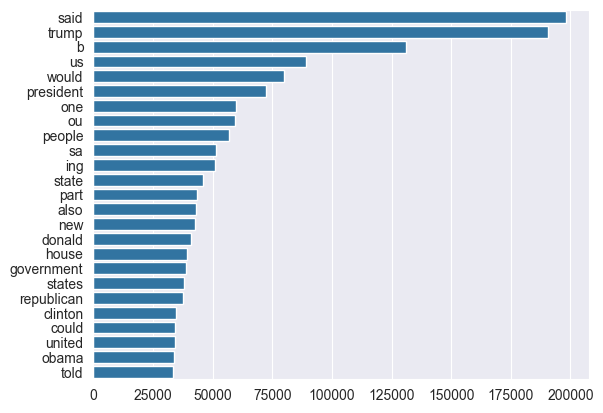

In [40]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)

sns.barplot(x = frequency, y = words)

As we can see, `said`, `trump`, `us` (probably lowercase form of US), `would` and `president` are our most frequent words. A main reason for that is the date range of our data: late 2016 - early 2018. During this time, Trump became the US president, hence his name shows up so many times. Since all the news came from the US, it"s understandable why `us` has a big frequency as well.

# Wordcloud

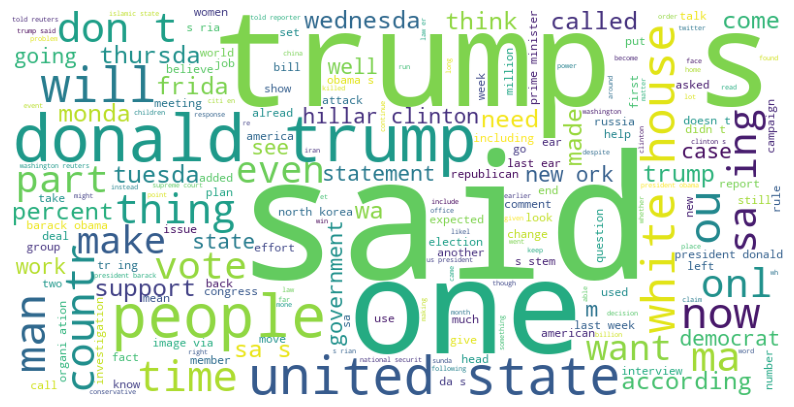

In [41]:
plt.figure(figsize=(10, 10))
text = df["clean_text"].values
cloud = WordCloud(width = 800, height=400, stopwords = STOPWORDS,
                  background_color="white",
                  max_words = 200,
                  ).generate(" ".join(text))
plt.imshow(cloud)
plt.axis("off")
plt.show()

Now, let"s take a more analytical look at the data

In [87]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

In [88]:
texts = df["clean_text"].tolist()
pos_counts = Counter()

Let"s see which parts of speech is most frequent in our corpus

In [91]:
for doc in nlp.pipe(texts, batch_size=100, n_process=1):
    pos_counts.update([token.pos_ for token in doc])

Since I don"t have a very powerful computer and the data size is massive, this is taking >30min per run

In [92]:
df_temp = pd.DataFrame(pos_counts.most_common(15),
                       columns=["Part_of_Speech", "count"])

Common parts of speech:
| ag	| Description       |   Example Words |
|-------|-------------------|-----------------|
| NN 	| Noun (singular)   | 	cat, tree, algorithm |
| NS 	| Noun (plural)     |	cats, ideas, datasets |
| VB 	| Verb (base form)  | 	run, eat, predict |
| VBD 	| Verb (past tense) | 	ran, ate, predicted |
| JJ 	| Adjective         | 	red, quick, efficient |
| RB 	| Adverb            |	quickly, well, always |
| IN 	| Preposition       |	in, on, of |
| DT 	| Determiner        |	a, the, some |


In [93]:
#from textblob import TextBlob

#text = " ".join(df["clean_text"])
#blob = TextBlob(text)
#top = Counter([pos[1] for pos in blob.tags])
#df_temp = pd.DataFrame(top.most_common(15))
#df_temp.columns = ["Part_of_Speech","count"]
fig = px.bar(df_temp, x="Part_of_Speech", y="count", title="Top 15 Part-Of-Speech tagging", width=700,height=700, color="Part_of_Speech")
fig.show()

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
# Initialize CountVectorizer
vec = CountVectorizer(stop_words=list(stop), ngram_range=(2, 3  ))

In [96]:
# Matrix of ngrams
bow = vec.fit_transform(df["clean_text"])

In [97]:
# Count frequency of ngrams
#count_values = bow.toarray().sum(axis=0) # MemoryError: Unable to allocate 5.03 TiB for an array with shape (62126, 11119763) and data type int64 BIG NO NO NO NO

MemoryError: Unable to allocate 5.03 TiB for an array with shape (62126, 11119763) and data type int64

In [98]:
sum_words = bow.sum(axis=0)
count_values = np.asarray(sum_words).ravel() # small 1D dense array of length vocab_size

In [99]:
# Create DataFrame from ngram frequencies
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

Text(0.5, 1.0, 'Class balance per dataset')

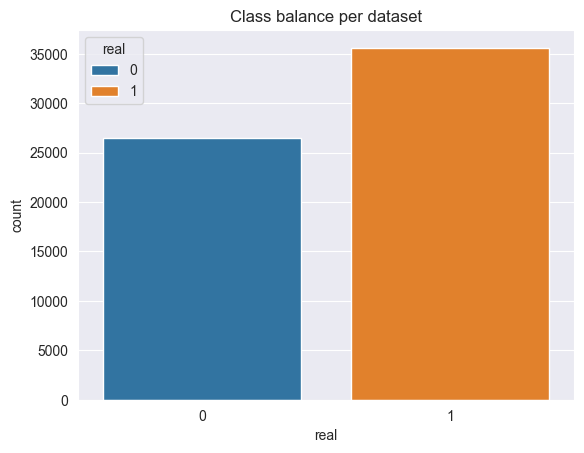

In [74]:
sns.countplot(x="real", data=df, hue="real")
plt.title("Class balance per dataset")

Average word length in each text

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62126 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        62126 non-null  object
 1   text         62126 non-null  object
 2   subject      62126 non-null  object
 3   real         62126 non-null  int64 
 4   clean_title  62126 non-null  object
 5   clean_text   62126 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.3+ MB


In [43]:
print("Label counts:\n", df["real"].value_counts(dropna=False))
print("Fake rows:", df[df["real"] == 0].shape[0])
print("Real rows:", df[df["real"] == 1].shape[0])

Label counts:
 real
1    35619
0    26507
Name: count, dtype: int64
Fake rows: 26507
Real rows: 35619


In [44]:
def avg_word_len(text: pd.Series) -> pd.Series:
    # Make sure we don"t have NaNs
    text = text.fillna("").astype(str).str.strip()
    word_lists = text.str.split()
    avg_len = word_lists.apply(
        lambda words: np.mean([len(w) for w in words]) if len(words) > 0 else np.nan
    )

    return avg_len

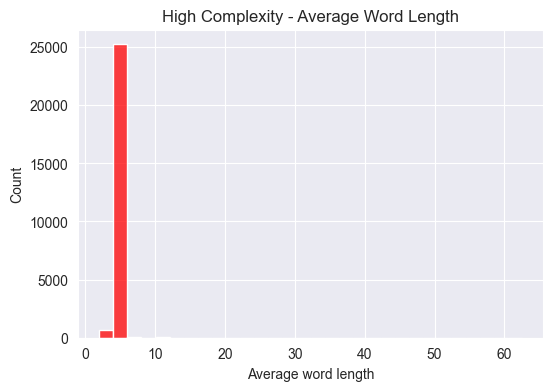

In [58]:
avg_len_high = avg_word_len(df[df["real"] <= 0]["clean_text"]).dropna()

plt.figure(figsize=(6, 4))
sns.histplot(x=avg_len_high, color="red", bins=30)
plt.title("High Complexity - Average Word Length")
plt.xlabel("Average word length")
plt.ylabel("Count")
plt.show()

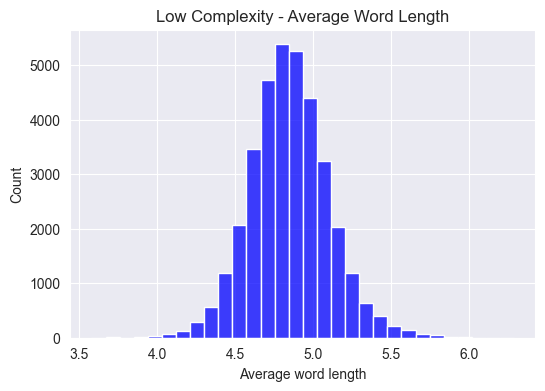

In [59]:
avg_len_low = avg_word_len(df[df["real"] > 0]["clean_text"]).dropna()

plt.figure(figsize=(6, 4))
sns.histplot(x=avg_len_low, color="blue", bins=30)
plt.title("Low Complexity - Average Word Length")
plt.xlabel("Average word length")
plt.ylabel("Count")
plt.show()

In [48]:
fig.suptitle("Average word length in a text")
plt.show()

Number of Sentences in text

In [70]:
import re
def count_sentences(text):
    text = str(text)
    parts = re.split(r"[.!?]+", text)
    parts = [p for p in parts if p.strip()]
    return len(parts)

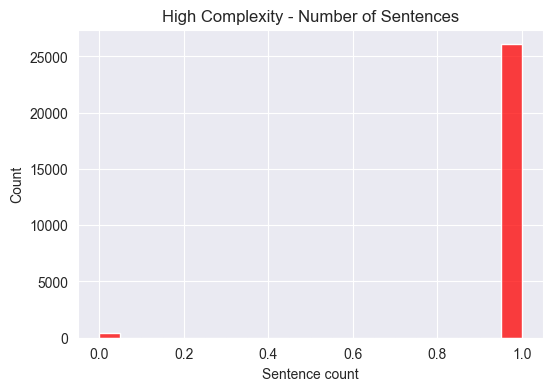

In [71]:
# High complexity
num_sents_high = df[df["real"] <= 0]["clean_text"].apply(count_sentences)

plt.figure(figsize=(6, 4))
sns.histplot(num_sents_high, color="red", bins=20)
plt.title("High Complexity - Number of Sentences")
plt.xlabel("Sentence count")
plt.ylabel("Count")
plt.show()

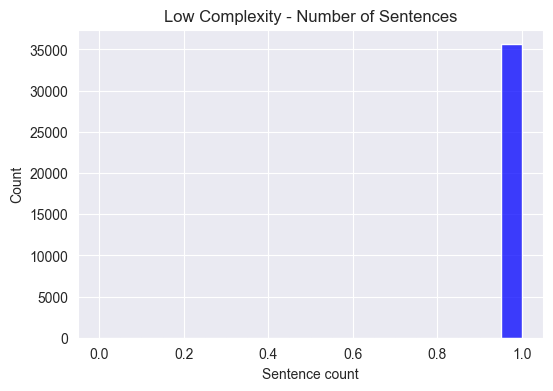

In [72]:
# Low complexity
num_sents_low = df[df["real"] > 0]["clean_text"].apply(count_sentences)

plt.figure(figsize=(6, 4))
sns.histplot(num_sents_low, color="blue", bins=20)
plt.title("Low Complexity - Number of Sentences")
plt.xlabel("Sentence count")
plt.ylabel("Count")
plt.show()

Now let us also compare these with the "target"

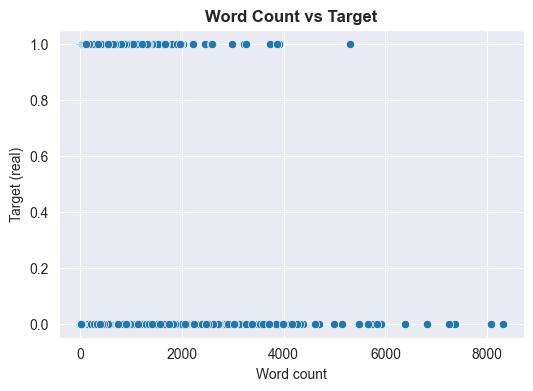

In [62]:
df["text_len"] = df["clean_text"].str.split().map(lambda x: len(x) if isinstance(x, list) else 0)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="text_len", y="real", data=df)
plt.title("Word Count vs Target", fontweight="bold")
plt.xlabel("Word count")
plt.ylabel("Target (real)")
plt.show()

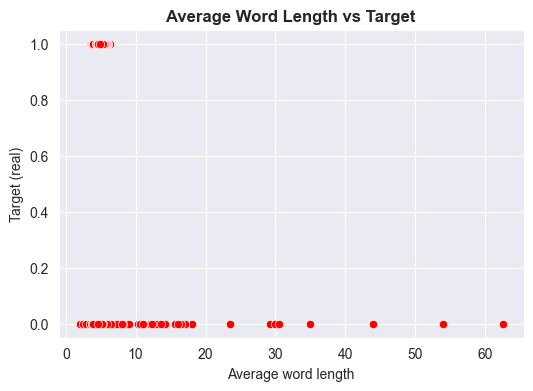

In [66]:
df["avg_word_len"] = avg_word_len(df["clean_text"])
df = df.reset_index(drop=True)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="avg_word_len", y="real", data=df, color="red")
plt.title("Average Word Length vs Target", fontweight="bold")
plt.xlabel("Average word length")
plt.ylabel("Target (real)")
plt.show()

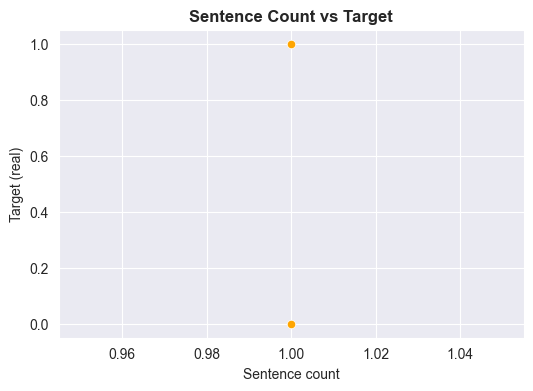

In [64]:
df["num_sents"] = df["clean_text"].apply(
    lambda x: len(str(x).split("\n"))
)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="num_sents", y="real", data=df, color="orange")
plt.title("Sentence Count vs Target", fontweight="bold")
plt.xlabel("Sentence count")
plt.ylabel("Target (real)")
plt.show()

Confusion Matrix

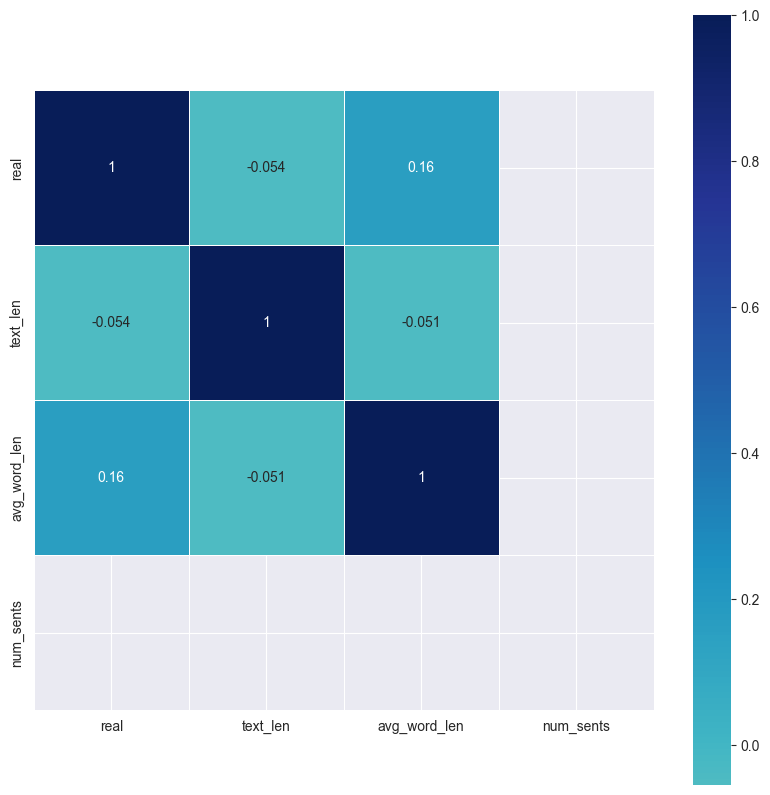

In [67]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="YlGnBu", center=0, square=True,
            linewidths=.5, annot=True)
plt.show()

Text(0.5, 1.0, 'Sentiment Polarity by Label')

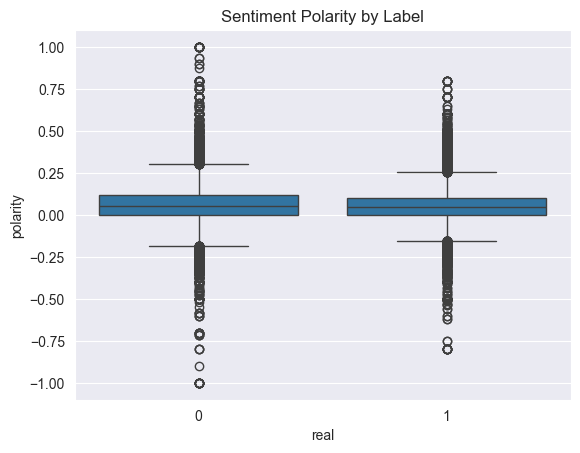

In [75]:
from textblob import TextBlob

df["polarity"] = df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df["clean_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

sns.boxplot(x="real", y="polarity", data=df)
plt.title("Sentiment Polarity by Label")